# Predicting Used Car Prices
## End-to-End Machine Learning Pipeline

##  Overview
This project builds a machine learning model to estimate the resale prices of used cars based on features like brand, mileage, model year, fuel type, and transmission. The goal is to enable data-driven pricing for sellers, buyers, and dealerships, improving transparency and decision-making in the used car market.

## Importing Required Libraries  

In this step, we import all the necessary Python libraries required for data manipulation, visualization, preprocessing, and machine learning.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
from lime.lime_tabular import LimeTabularExplainer
from IPython.display import display, HTML
import joblib
import warnings
import io
warnings.filterwarnings('ignore')



## Data Loading & Initial Inspection
We load the dataset of used cars and inspect its structure. This helps understand the number of records and features before proceeding.

In [2]:
df = pd.read_csv("usedCars.csv")

## Exploratory Data Analysis (EDA)

In [3]:
df.head(20)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5
5,559682,MERCEDES BENZ,E CLASS,E 250 CDI AVANTGARDE,DIESEL,Black,87700,SEDAN,Automatic,2013-04-01,2013,NaN,9.99 Lakhs,3rd Owner,Karnataka,Zippy Automart,Bangalore,0,7.2
6,560083,VOLKSWAGEN,AMEO,HIGHLINE DIESEL DSG,DIESEL,Blue,70577,SEDAN,NaN,2017-06-01,2017,NaN,6.75 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
7,560659,MARUTI SUZUKI,ERTIGA,ZXI,PETROL,A Blue,76259,MPV,NaN,2013-07-01,2013,NaN,6 Lakhs,1st Owner,Karnataka,NK Cars,Bangalore,1,7.6
8,560662,MARUTI SUZUKI,SWIFT,LXI,PETROL,Silver,85000,HATCHBACK,Manual,2015-02-01,2015,NaN,4.8 Lakhs,3rd Owner,Karnataka,NK Cars,Bangalore,0,7.4
9,560666,HYUNDAI,I10,MAGNA,PETROL,Red,77000,HATCHBACK,Manual,2008-05-01,2008,NaN,2.4 Lakhs,2nd Owner,Karnataka,NK Cars,Bangalore,0,7.2


In [4]:
df.shape

(1064, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


## Checking Data Distribution and Missing Values  

We analyze statistical summaries and count missing values to assess data quality.

In [6]:
df.describe()

,Id,Kilometer,ModelYear,Warranty,QualityScore
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,568156.542293,52807.187970,2016.864662,0.738722,7.770207
std,16438.139974,33840.296979,2.996786,0.439538,0.719717
min,525978.000000,101.000000,2003.000000,0.000000,0.000000
25%,555321.500000,32113.500000,2015.000000,0.000000,7.500000
50%,572753.000000,49432.000000,2017.000000,1.000000,7.800000
75%,583072.750000,68828.500000,2019.000000,1.000000,8.100000
max,589122.000000,640000.000000,2023.000000,1.000000,9.400000


In [7]:
df.describe(include='O')

,Company,Model,Variant,FuelType,Colour,BodyStyle,TransmissionType,ManufactureDate,CngKit,Price,Owner,DealerState,DealerName,City
count,1064,1064,1064,1063,1064,1064,350,1064,22,1064,1064,1064,1064,1064
unique,23,218,575,5,76,10,9,162,2,367,4,10,57,11
top,MARUTI SUZUKI,SWIFT,VXI,PETROL,White,HATCHBACK,Manual,2018-01-01,Company Fitted,6.25 Lakhs,1st Owner,Delhi,Car Choice Exclusif,Delhi
freq,252,38,37,670,289,423,269,25,14,22,897,196,67,196


In [8]:
# Check missing values per column
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [9]:
# Clean and convert Price to numeric
def clean_price(x):
    x = str(x)
    if 'Lakhs' in x:
        return float(x.replace(' Lakhs',''))
    else:
        return float(x.replace(',','')) / 100000

df['Price'] = df['Price'].apply(clean_price)



## Group by some categorical features to see average price

In [10]:
df.groupby('FuelType')['Price'].mean()

FuelType
CNG        5.744615
DIESEL    10.858630
HYBRID    18.750000
LPG        3.500000
PETROL     7.073866
Name: Price, dtype: float64

In [11]:
df.groupby('TransmissionType')['Price'].mean()

TransmissionType
A            21.375000
AUOTMATIC     9.000000
AUTOMATIC     4.950000
Automatic     8.979800
Cvt          11.950000
M             6.500000
MANUAL        4.720000
Manual        4.934238
manual        6.550000
Name: Price, dtype: float64

In [12]:
df.groupby('Owner')['Price'].mean()

Owner
1st Owner    8.638450
2nd Owner    6.762293
3rd Owner    7.733333
4th Owner    5.000000
Name: Price, dtype: float64

In [13]:
df.groupby('Warranty')['Price'].mean()

Warranty
0    7.182770
1    8.763562
Name: Price, dtype: float64

In [14]:
df.groupby('Company')['Price'].mean().sort_values(ascending=False).head(10)


Company
MG               17.933636
MERCEDES BENZ    17.256923
BMW              15.992857
VOLVO            15.350000
KIA              14.803571
JEEP             14.763684
TOYOTA           14.747407
ISUZU            13.966667
AUDI             13.537500
SKODA            12.071600
Name: Price, dtype: float64

------
Fuel type and ownership can influence average price (e.g., CNG vs Diesel vs Petrol).
Manual vs Automatic transmission types have different average prices.
Cars with warranty tend to have higher average prices.
High-end brands (e.g., MG, Mercedes, BMW) have higher average prices.

In [15]:
## Identify numericical columns
numerical_cols = df.select_dtypes(include='number').columns
print("Numerical:", numerical_cols)

Numerical: Index(['Id', 'Kilometer', 'ModelYear', 'Price', 'Warranty', 'QualityScore'], dtype='object')


In [16]:
#Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical:", categorical_cols)

Categorical: Index(['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'BodyStyle',
       'TransmissionType', 'ManufactureDate', 'CngKit', 'Owner', 'DealerState',
       'DealerName', 'City'],
      dtype='object')


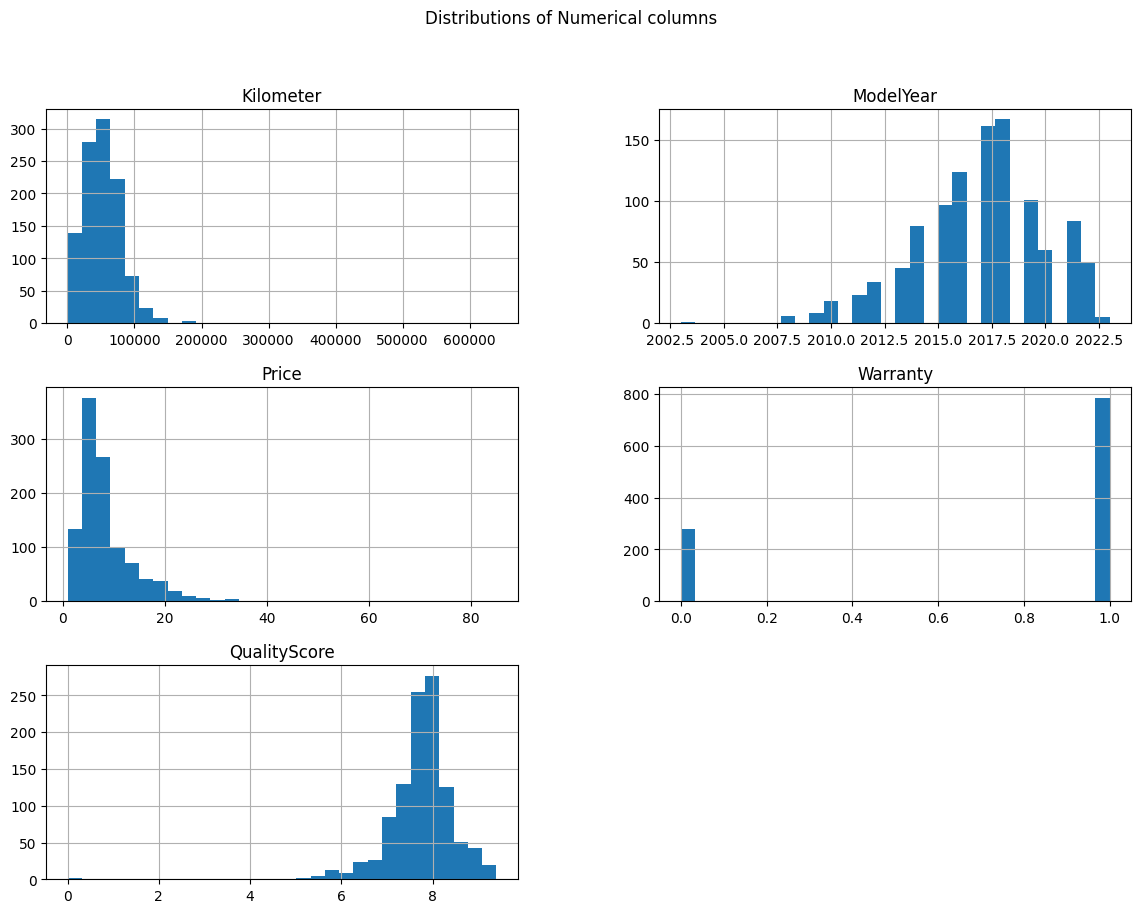

In [17]:
# Visualize distributions of numerical features
numerical_cols = ['Kilometer', 'ModelYear', 'Price', 'Warranty', 'QualityScore']
df[numerical_cols].hist(bins=30, figsize=(14,10))
plt.suptitle('Distributions of Numerical columns')
plt.show()

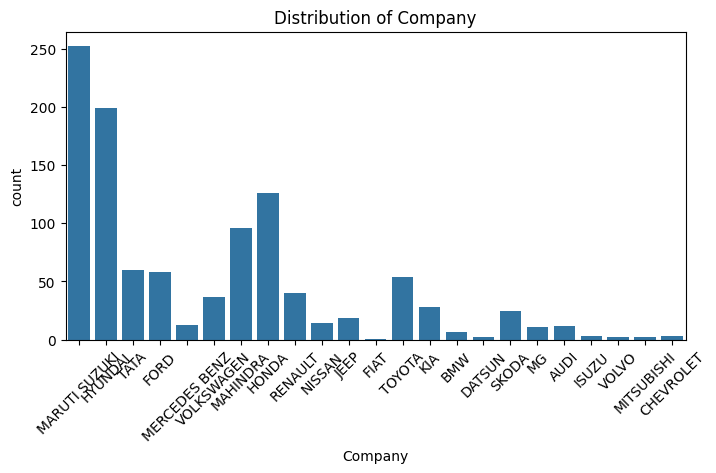

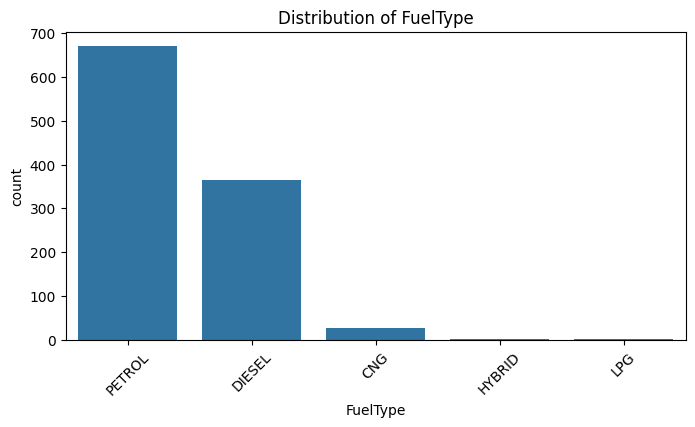

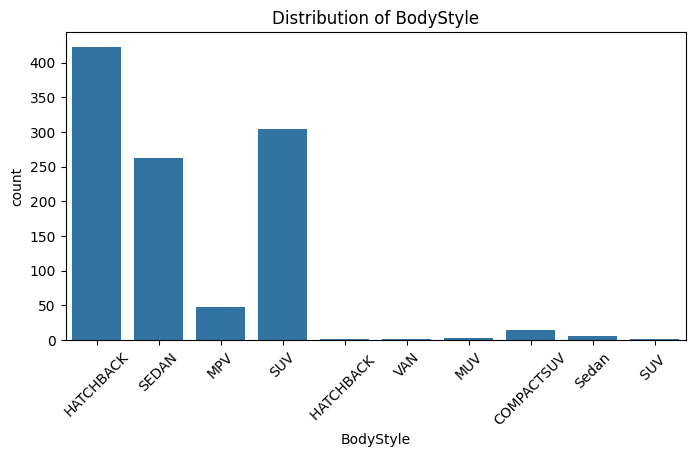

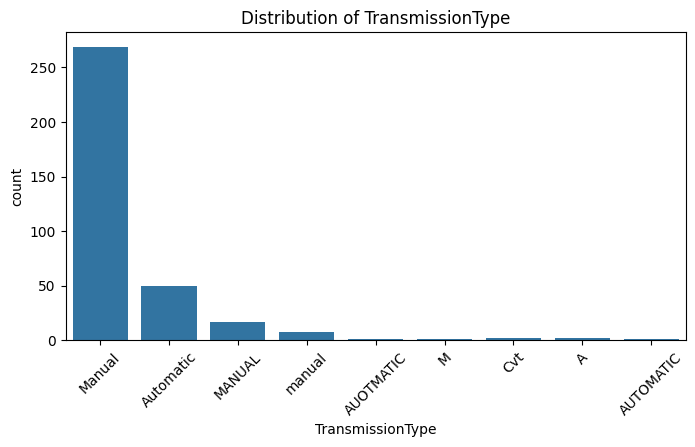

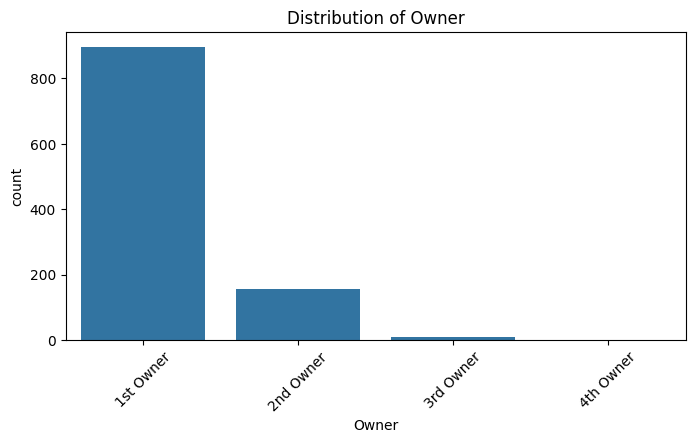

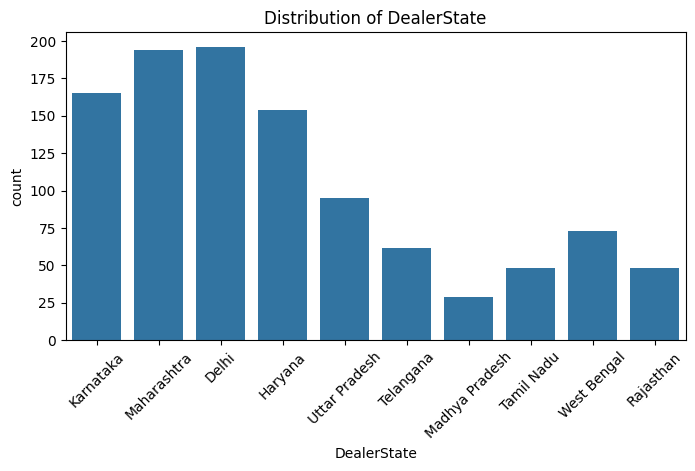

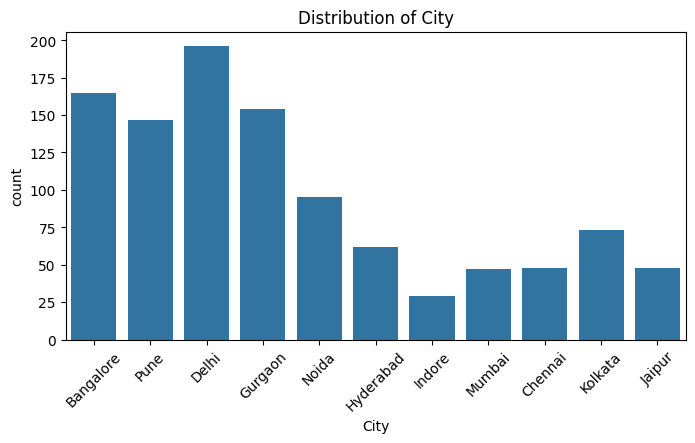

In [18]:
#Visualize distributions of Categorical features
categorical_cols = [
    'Company', 'FuelType', 'BodyStyle',
    'TransmissionType', 'Owner',
    'DealerState', 'City'
]
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

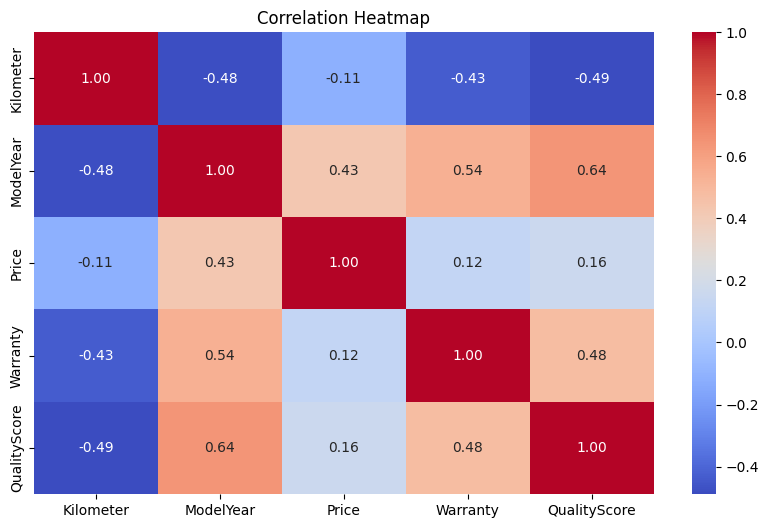

In [19]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### -------
The correlation matrix shows relationships between numeric features. Notably, Kilometer is negatively correlated with Price (higher mileage, lower price). ModelYear and Price are positively correlated (newer cars are more expensive). QualityScore shows a moderate positive correlation with Price, suggesting higher-rated cars sell for more

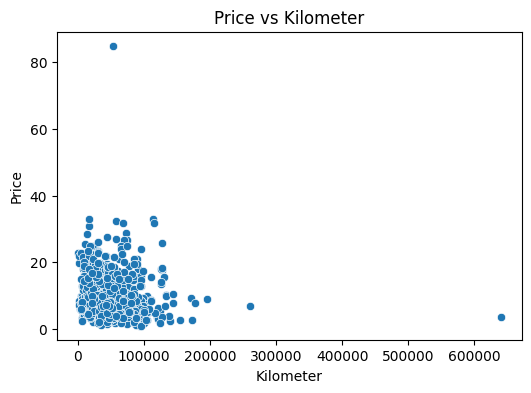

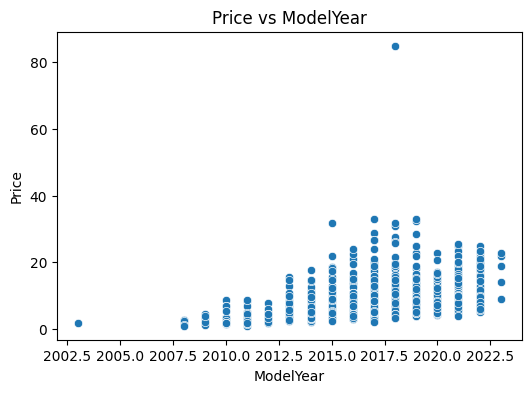

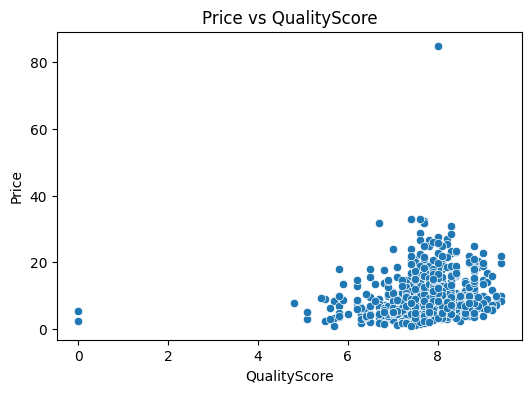

In [20]:
# Scatter plots of Price vs key numerical features
for col in ['Kilometer', 'ModelYear', 'QualityScore']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='Price')
    plt.title(f'Price vs {col}')
    plt.show()

## ------
cars with higher mileage (Kilometer) tend to have lower prices; newer cars (ModelYear) tend to have higher prices; and there is a slight upward trend of QualityScore with Price. No strong non-linear patterns are evident in these plots."

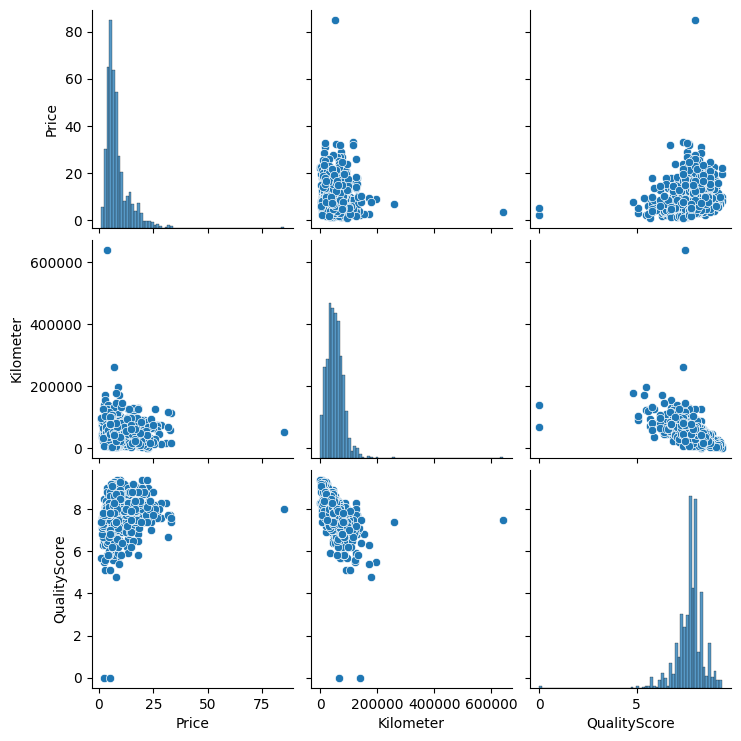

In [21]:
sns.pairplot(df[['Price','Kilometer','QualityScore']])
plt.show()

## Boxplot Visualization of Key Numerical Features

This section displays the distribution and outliers of three important numerical features in the dataset:

- Kilometer: Indicates total distance driven.
- ModelYear: Shows the car's manufacturing year.
- QualityScore: A subjective rating of the vehicle’s condition.

Boxplots help identify central tendencies, spread, and the presence of outliers for each variable.


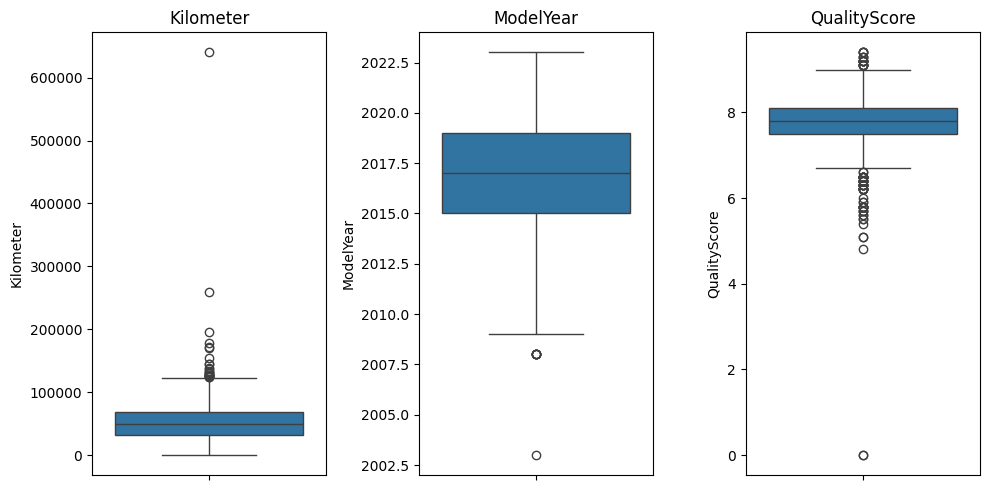

In [22]:
numerical_cols = ['Kilometer', 'ModelYear', 'QualityScore']

plt.figure(figsize=(10,5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Data Cleaning & Preprocessing
This step prepares the dataset for modeling by handling missing values, encoding categorical features, and treating outliers.

In [23]:
#Removing missing values 
df.drop(columns=['CngKit'], inplace=True)


In [24]:
#fill missing values with Unknown
df['TransmissionType'].fillna('Unknown',inplace=True)
df['FuelType'].fillna('Unknown',inplace = True)

In [25]:
## Outlier handling
for col in ['Kilometer', 'QualityScore']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

In [26]:
#Dropping irrelevent columns 
df.drop(['Id', 'ManufactureDate'], axis=1, inplace=True)

In [27]:
categorical_cols = df.select_dtypes(include='object').columns

In [28]:
## Label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Feature Engineering
 we create a new feature called car age .The age of a car has a significantimpact on selling price Older cars generally have lower prices so create this feature model better understand.

In [29]:
REFERENCE_YEAR = df['ModelYear'].max()
df['CarAge'] = REFERENCE_YEAR - df['ModelYear']


## Feature Scaling 
We apply StandardScaler to scale the numerical features so that they are on a similar scale .


In [30]:
scaler = StandardScaler()
numerical_cols = ['Kilometer', 'ModelYear', 'QualityScore', 'CarAge']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [31]:
df.head()

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ModelYear,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore,CarAge
0,12,34,5,4,61,-0.692907,1,8,0.379030,5.75,0,2,52,0,1,-0.007929,-0.379030
1,12,11,275,4,56,-1.542958,1,7,1.380573,4.35,0,2,38,0,1,0.889541,-1.380573
2,7,91,10,4,34,-0.518549,1,7,-0.622513,4.70,0,2,4,0,1,0.171565,0.622513
3,19,135,527,4,0,-1.439502,1,8,1.046726,9.90,0,2,1,0,1,0.530553,-1.046726
4,5,83,211,1,61,1.960999,1,7,-2.291752,2.70,1,2,56,0,0,-0.546411,2.291752


## Model Tranning & Feature Importance
We train regression models  to predict car prices and evaluate them on test data.

In [32]:
X = df.drop('Price', axis=1)

In [33]:
y = df['Price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
rf = RandomForestRegressor(random_state=42)

In [36]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


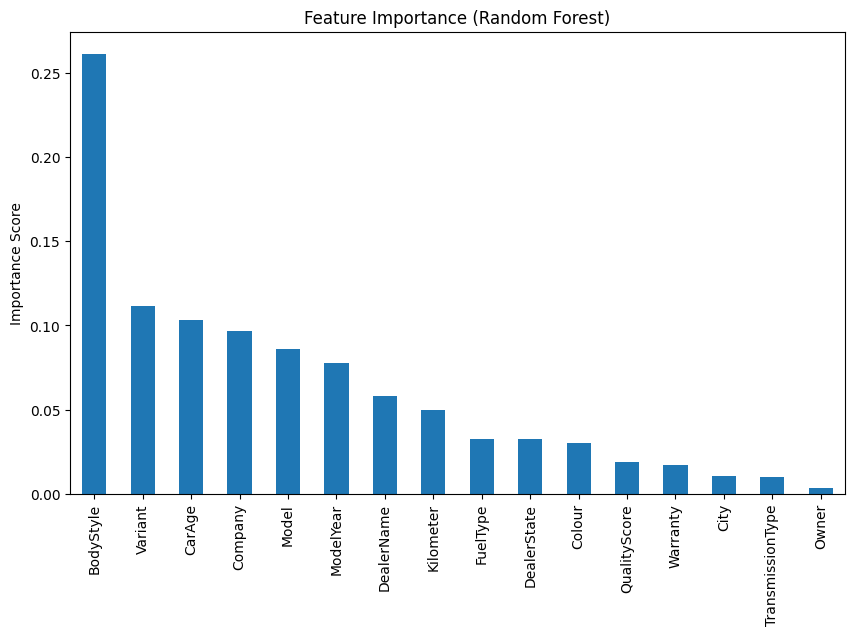

In [37]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.show()

------------------
The results show that Body Style, Variant, Car Age, Company, Model, and Model Year have the strongest impact on price prediction, while factors such as Transmission Type, City, and Ownership have relatively lower influence.

## Model Evaluation & Comparison
We compare performance using MSE, MAE, and R² score to identify the best-performing model.


In [38]:
models = { 
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [39]:
result={}

In [40]:
### Evaluate models using MSE, MAE and R2 Score
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    result[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")



Decision Tree Regressor Performance:
MSE: 9.49, MAE: 2.00, R2: 0.60

Random Forest Regressor Performance:
MSE: 7.74, MAE: 1.79, R2: 0.68

XGBoost Regressor Performance:
MSE: 6.06, MAE: 1.52, R2: 0.75

Gradient Boosting Performance:
MSE: 8.17, MAE: 1.69, R2: 0.66


-----------------
XGBoost achieves the lowest error (MSE = 6.06, MAE = 1.52) and the highest R² score (0.75), indicating superior prediction accuracy.


In [41]:
results_df = pd.DataFrame(result).T

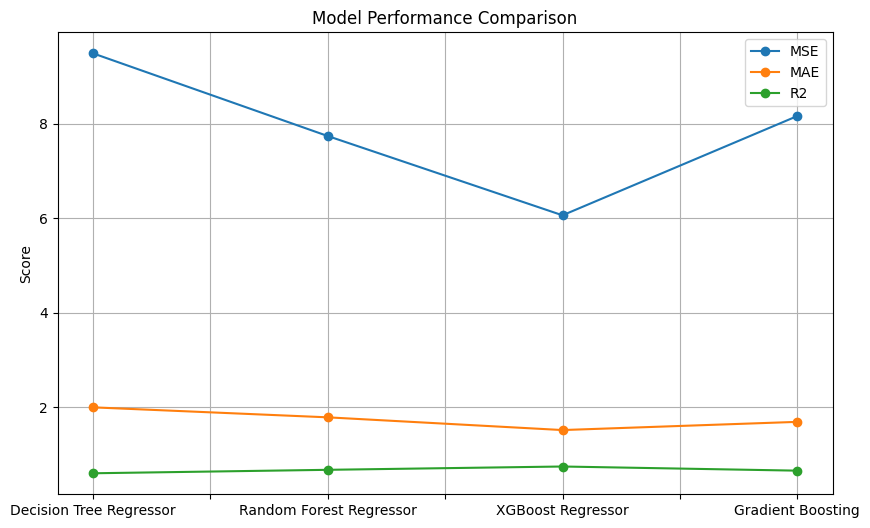

In [42]:
results_df.plot(figsize=(10,6), marker='o')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.grid(True)
plt.show()


##  Final Model Selection & Validation


In [43]:
Final_model = XGBRegressor(random_state=42)

In [44]:
Final_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [45]:
final_pred = Final_model.predict(X_test)


In [46]:
print("Final R2:", round(r2_score(y_test, final_pred),2))

Final R2: 0.75


In [47]:
train_pred = Final_model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)


In [48]:
test_pred = Final_model.predict(X_test)
test_r2 = r2_score(y_test, test_pred)

In [49]:
print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train R2: 0.999761554653559
Test R2: 0.7465213447659458


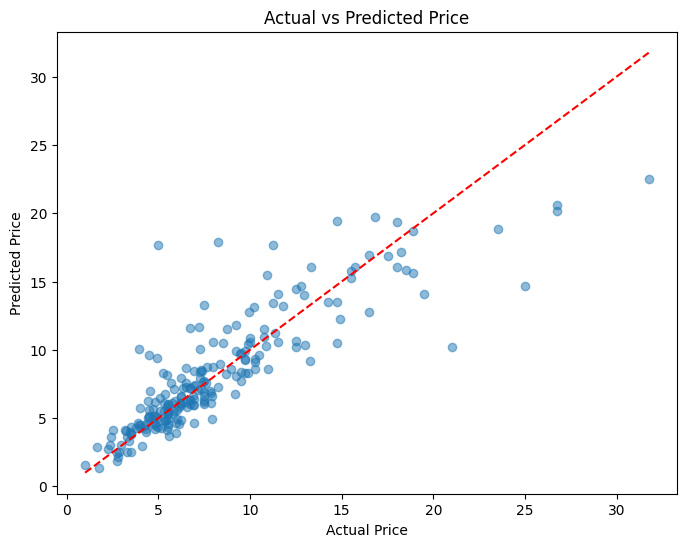

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()



## observation
The predicted prices closely follow the actual prices, showing strong alignment with the ideal prediction line.
This demonstrates that the final XGBoost model is highly effective in capturing real market behavior and producing accurate price estimates.


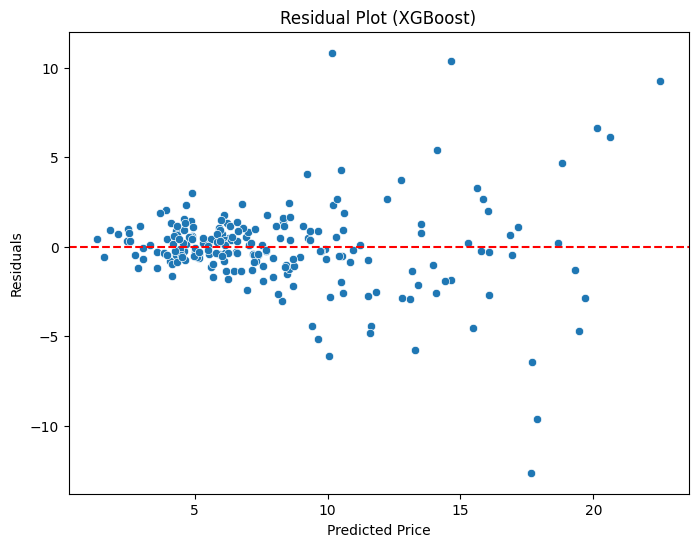

In [51]:
residuals = y_test - final_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()


------------------
The residuals are randomly distributed around zero, indicating that the model does not show systematic bias and is well-fitted across different price ranges.



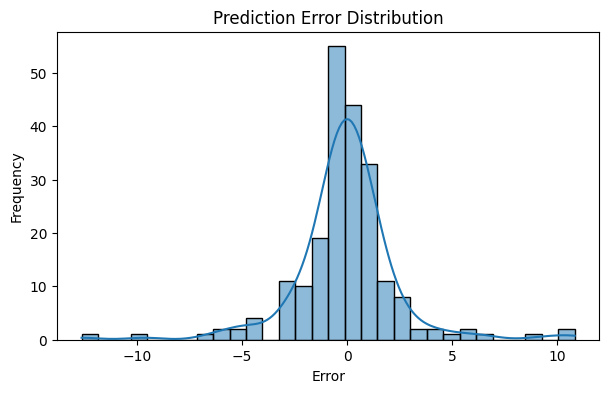

In [52]:
errors = y_test - final_pred

plt.figure(figsize=(7,4))
sns.histplot(errors, bins=30, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

----------
The prediction errors are concentrated around zero, indicating that the model produces unbiased and reliable estimates across different price ranges.


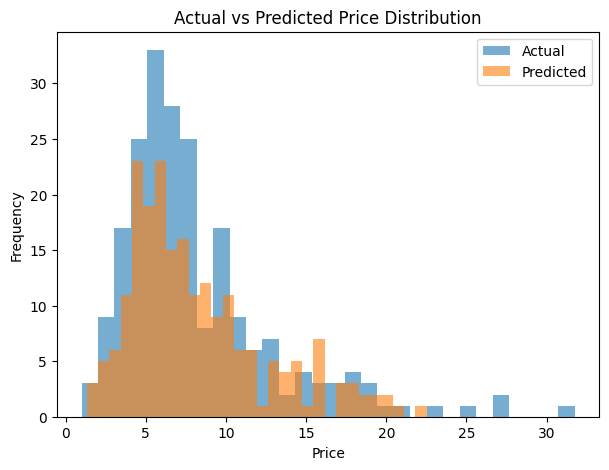

In [53]:
plt.figure(figsize=(7,5))

plt.hist(y_test, bins=30, alpha=0.6, label='Actual')
plt.hist(final_pred, bins=30, alpha=0.6, label='Predicted')

plt.title("Actual vs Predicted Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

-------
The predicted price distribution closely follows the actual price distribution, demonstrating strong agreement between model predictions and real market values.



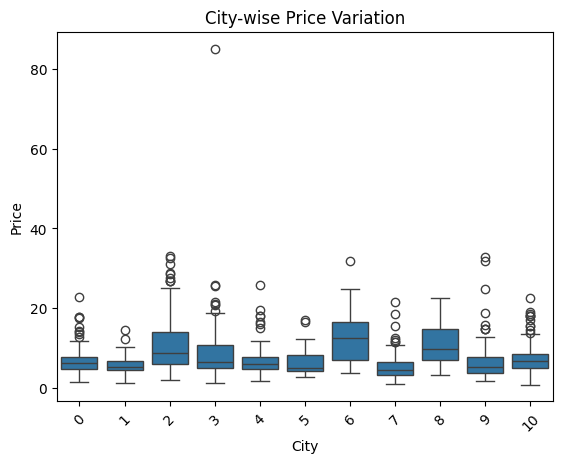

In [54]:
sns.boxplot(x='City', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("City-wise Price Variation")
plt.show()


---
Car prices vary significantly across different cities, reflecting the influence of local demand, market conditions, and buyer preferences.

Some cities consistently show higher median prices, while others display greater price variability, indicating differing levels of market competitiveness.

This insight helps businesses tailor pricing strategies for specific regions and optimize inventory distribution.



In [55]:
print("\n--- Final Model Summary ---")
print("Best Model: XGBoost Regressor")
print(f"R2 Score: {r2_score(y_test, final_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, final_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, final_pred):.2f}")



--- Final Model Summary ---
Best Model: XGBoost Regressor
R2 Score: 0.75
MAE: 1.52
MSE: 6.06


## Model Interpretability -Shap Analysis
To identify the most influential featuresaffecting used car price prediction .To understand whether a feature increases the predicte price .

In [56]:
X_sample = X_test.sample(200, random_state=42)

In [57]:
explainer = shap.Explainer(Final_model)
price_shap_values = explainer(X_sample)

In [58]:
np.shape(price_shap_values)

(200, 16)

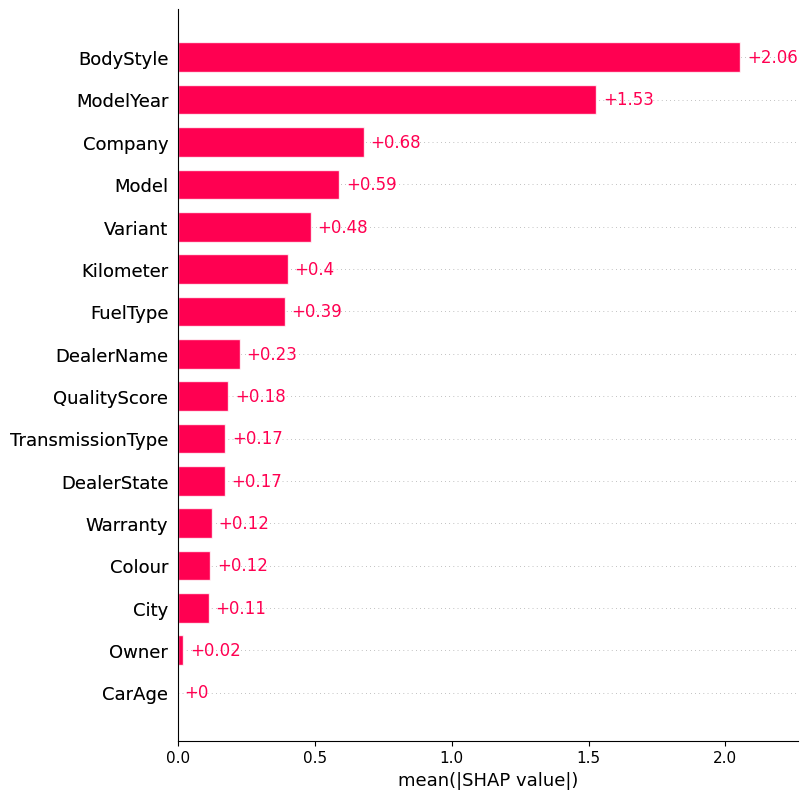

In [59]:
shap.plots.bar(price_shap_values, max_display=16)

### Observations:
-  `BodyStyle` is the most influential feature, contributing an average of **+2.06 Lakhs** to the model’s predictions.
- `ModelYear` and `Company` also have strong impact, suggesting that newer models and certain brands significantly raise the predicted price.
- Features like `Colour`, `Warranty`, `City`, and `Owner` had relatively minor effects.
- `CarAge` appears to have no impact, possibly due to being correlated with other variables (e.g., `ModelYear`).


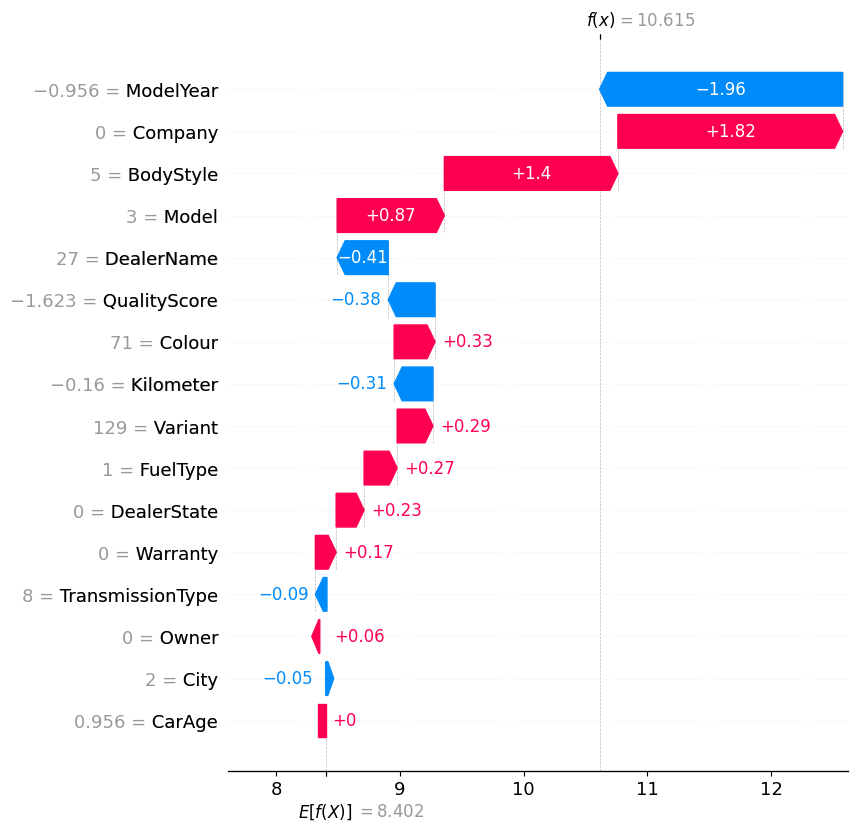

In [60]:
shap.plots.waterfall(price_shap_values[0],max_display=16)

Key Details:
-  **Base Value (E[f(x)]):** ~8.40 Lakhs — this is the average model prediction across all cars.
- **Final Prediction (f(x)) = 10.615 Lakhs** — after all SHAP values are added.
  
 Negative Contributors (Pushed price down):
- ModelYear = -0.956 (older car model)
- DealerName = 27 and QualityScore = -1.62 — reduced the confidence or trust in quality.
- Kilometer = -0.16` — higher mileage decreases price.

Positive Contributors (Pushed price up):
- Company = 0 and BodyStyle = 5` — strong influence adding +1.82 and +1.4 Lakhs.
- Model = 3, Colour, Variant, and FuelType — all added small positive values.

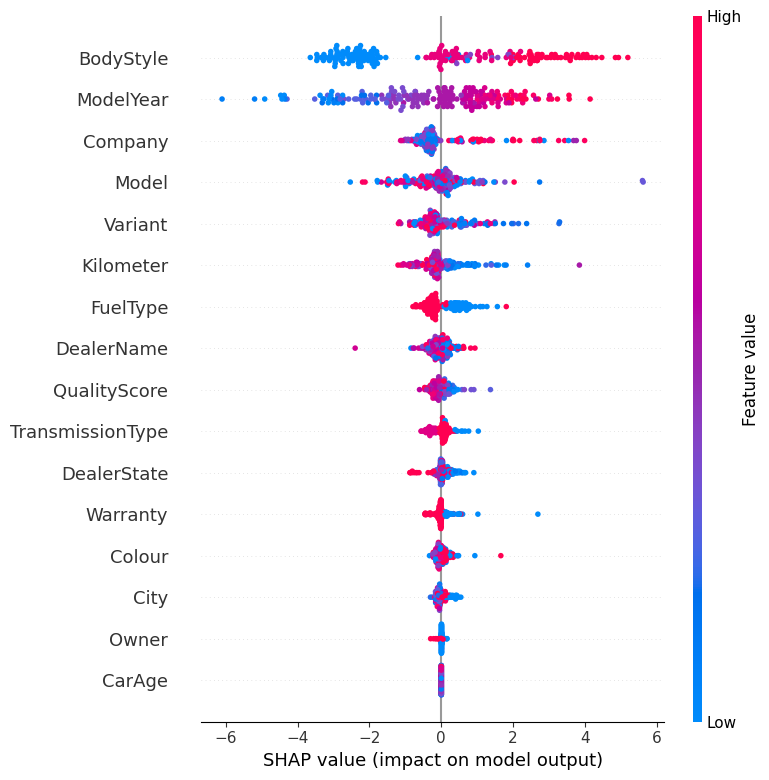

In [61]:
shap.summary_plot(price_shap_values)

### Observations:
- `BodyStyle`, `ModelYear`, and `Company` are the most influential features overall.
- For `BodyStyle`, **low values (blue)** tend to reduce the predicted price (shift left), while high values increase it.
- `ModelYear`: **Newer cars (red)** generally increase the price (SHAP value > 0), older ones (blue) reduce it.
- `Kilometer`: **Lower mileage (blue)** tends to increase price, while higher mileage (red) pushes the prediction down.
- Several features like `Colour`, `Owner`, `City`, and `CarAge` show low spread and small impact.


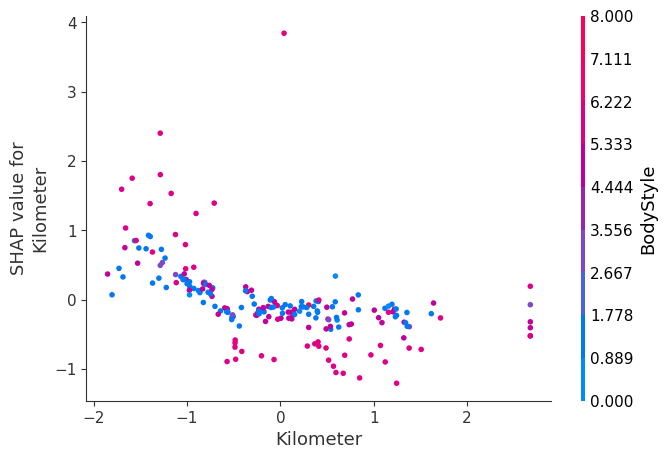

In [62]:
shap.dependence_plot(
    "Kilometer",
    price_shap_values.values,
    X_sample
)


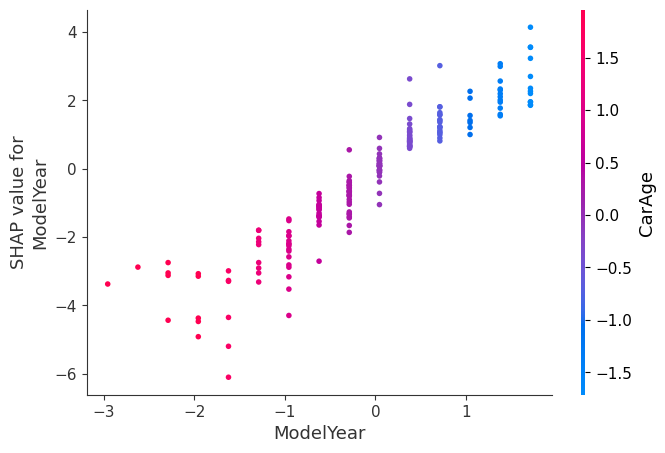

In [63]:
shap.dependence_plot(
    "ModelYear",
    price_shap_values.values,
    X_sample
)



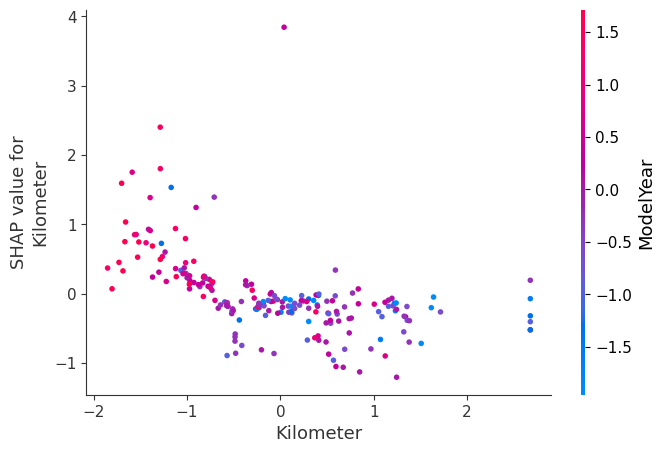

In [64]:
shap.dependence_plot(
    "Kilometer",
    price_shap_values.values,
     X_sample,
    interaction_index="ModelYear"
  
)

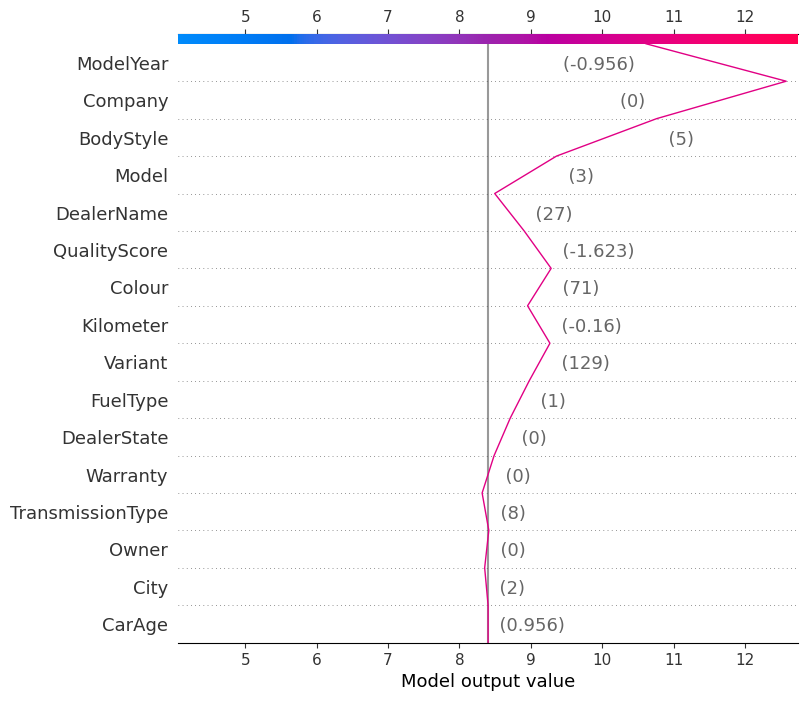

In [65]:
price_shap_values = explainer(X_sample)
shap.decision_plot(
    explainer.expected_value,
    price_shap_values[0].values,
    X_sample.iloc[0]
)

-----
The SHAP decision plot reveals how individual features contributed to the predicted car price.

The prediction starts from a base value of approximately 8.5 Lakhs.

Features such as Variant, Company, and CarAge had strong positive contributions, increasing the final predicted value.

In contrast, features like ModelYear and QualityScore had negative contributions, slightly lowering the price.

The cumulative effect of these features led to a final prediction of approximately 12 Lakhs for this specific car.

## LIME Explainer
it helps interpret individual predictions by approximating the model locally with a simpler, interpretable model.


In [66]:
# Initialize LIME explainer for regression model
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)


In [67]:
# Generate a LIME explanation for a single test instance (index i)
# Pass the feature values of the test sample and the model's predict function
i=0
exp = explainer.explain_instance(
    X_test.iloc[i].values,      # ← yeh missing tha
    Final_model.predict        # model function
)



In [68]:
display(HTML(exp.as_html()))

 **Predicted Price:** ₹6.09 Lakhs for this specific used car.
-  **Positive Contributions:**
  - `Company = 19` and `ModelYear = 0.38` **increased** the prediction by ~1.72 Lakhs and ~0.78 Lakhs respectively.
-  **Negative Contributions:**
  - `BodyStyle = HATCHBACK` **decreased** the prediction significantly by ~1.76 Lakhs.
  - Other features such as `QualityScore`, `Model`, and `DealerName` also had small negative impacts.

In [69]:
exp.as_list()

[('0.05 < ModelYear <= 0.71', 1.8431830410541834),
 ('BodyStyle <= 1.00', -1.7452181721997964),
 ('Model > 168.00', -0.8035033387352496),
 ('Company > 12.00', 0.7061621878185208),
 ('31.00 < DealerName <= 44.00', -0.563995377355913),
 ('0.00 < Warranty <= 1.00', -0.5005984599734645),
 ('7.00 < TransmissionType <= 8.00', 0.2969418621116661),
 ('1.00 < FuelType <= 4.00', -0.15981173776128416),
 ('QualityScore > 0.53', -0.14461493124384386),
 ('1.00 < DealerState <= 3.00', -0.13475878060883703)]

In [70]:
##Model Saved

In [71]:
joblib.dump(Final_model, 'used_car_price_model.pkl')

['used_car_price_model.pkl']

In [72]:
print("Model saved as 'used_car_price_model.pkl'")

Model saved as 'used_car_price_model.pkl'


## Conclusion

-  **XGBoost** and **Random Forest**  performed best among tested models, with XGBoost achieving the highest R² score on the test data.
-  **SHAP** and **LIME** were used to interpret model predictions, helping identify which features influenced pricing the most (e.g., `BodyStyle`, `ModelYear`, `Company`).
-  **Hyperparameter tuning** was attempted but led to slightly lower test accuracy, possibly due to overfitting or narrow parameter ranges — so the untuned model was retained.